# Analysis of top imdb rated actors

The data comprises of 10,000 actors and actresses from imdb. The following questions will be answered in this notebook

1. What is the overall distribution of their date of birth along the months?
2. What is the overall distribution for male actors?
3. What is the overall distribution for female actresses?
4. How are the actors distributed w.r.t age bucket?
5. Who are the highest ranked oldest actors?
6. Who are the highest ranked youngest actors?

Let's load the data and do the necessary cleaning beofre answering the questions

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load the data
actor_data = pd.read_csv('./output/actor_birthday_data.csv', names = ['name', 'rank', 'gender', 'dob'])

# Remove the actors with no dob and rows that don't have year in the start
actor_data = actor_data[ actor_data['dob'].notnull() ]
actor_data = actor_data[ actor_data['dob'].str.match('^\d\d\d\d-*') ]

# Column for the age of the actor
actor_data['age'] = actor_data['dob'].apply(lambda x: 2017 - int(x[:4]))

# Column for the month the actor was born
def get_month(date):
    try:
        dob_month = pd.Timestamp(date).month
    except ValueError:
        return np.NaN

    return dob_month

actor_data['dob_month'] = actor_data['dob'].apply(get_month)

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


##  1. What is the overall distribution of their date of birth along the months?

Populating the interactive namespace from numpy and matplotlib


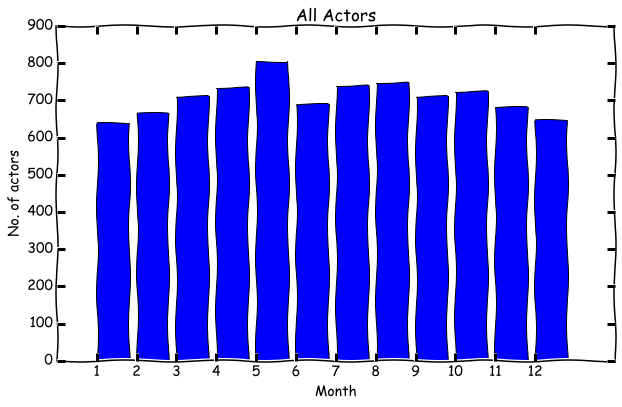

In [3]:
agg_month_count_data = actor_data[['dob_month', 'name']].groupby(['dob_month']).agg(['count'])
agg_month_count_data.columns = ['counts']

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

plt.xkcd()
plt.bar(agg_month_count_data.index, agg_month_count_data.counts)
plt.title('All Actors')
plt.xticks(agg_month_count_data.index)
plt.xlabel('Month')
plt.ylabel('No. of actors')

plt.show()

For the top 500 ranked actors - male and female

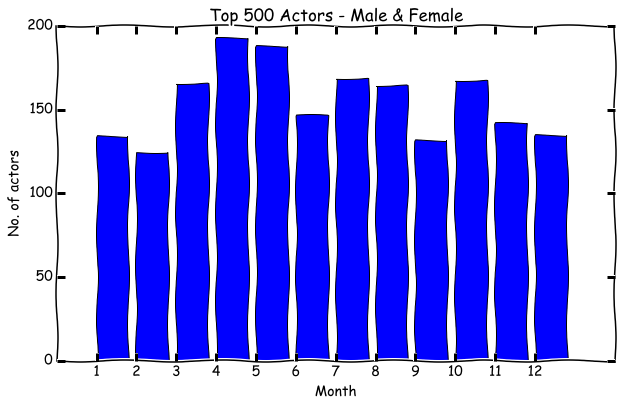

In [8]:
agg_month_count_data = actor_data[ actor_data['rank'] <= 500 ]
agg_month_count_data = agg_month_count_data[['dob_month', 'name']].groupby(['dob_month']).agg(['count'])
agg_month_count_data.columns = ['counts']

plt.xkcd()
plt.bar(agg_month_count_data.index, agg_month_count_data.counts)
plt.title('Top 500 Actors - Male & Female')
plt.xticks(agg_month_count_data.index)
plt.xlabel('Month')
plt.ylabel('No. of actors')

plt.show()

What is the age distribution of the actors born in the month of April?

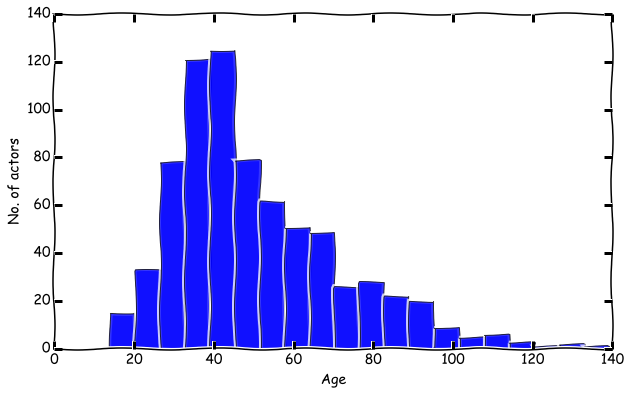

In [7]:
agg_data = actor_data[ actor_data['dob_month'] == 4 ]

plt.hist(agg_data['age'], bins=20, facecolor='blue', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('No. of actors')

plt.show()

## 2. What is the overall distribution for male actors?

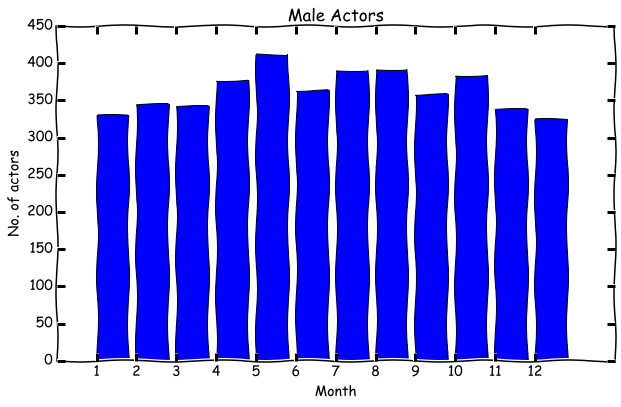

In [43]:
agg_month_count_data = actor_data[ actor_data['gender'] == 'male']
agg_month_count_data = agg_month_count_data[['dob_month', 'name']].groupby(['dob_month']).agg(['count'])
agg_month_count_data.columns = ['counts']

plt.bar(agg_month_count_data.index, agg_month_count_data.counts)
plt.title('Male Actors')
plt.xticks(agg_month_count_data.index)
plt.xlabel('Month')
plt.ylabel('No. of actors')

plt.show()

## 3. What is the overall distribution for female actresses?

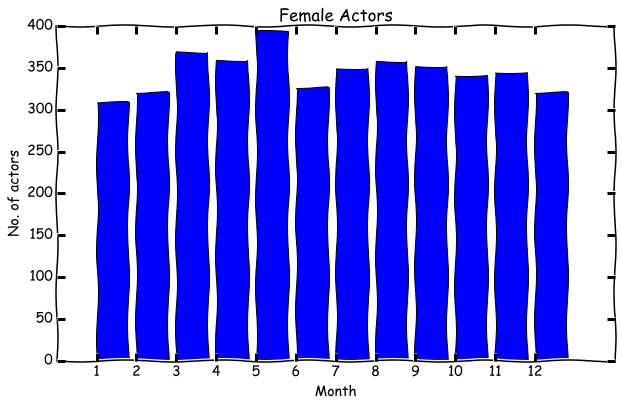

In [42]:
agg_month_count_data = actor_data[ actor_data['gender'] == 'female']
agg_month_count_data = agg_month_count_data[['dob_month', 'name']].groupby(['dob_month']).agg(['count'])
agg_month_count_data.columns = ['counts']

plt.bar(agg_month_count_data.index, agg_month_count_data.counts)
plt.title('Female Actors')
plt.xticks(agg_month_count_data.index)
plt.xlabel('Month')
plt.ylabel('No. of actors')

plt.show()

## 4. What is the overall distribution of their date of birth along the months?

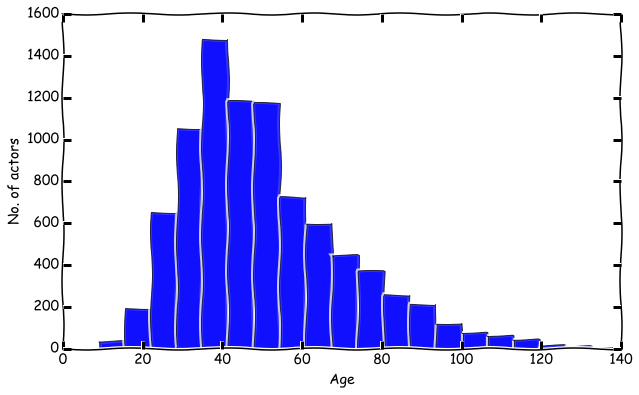

In [46]:
plt.hist(actor_data['age'], bins=20, facecolor='blue', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('No. of actors')

plt.show()

## 5. Who are the highest ranked senior actors?

Actors between 60 and 80 

In [61]:
actor_data[ (actor_data['age'] >= 60) & (actor_data['age'] < 80) ].sort('rank').head()

,name,rank,gender,dob,age,dob_month
8,Michael Rooker,9,male,1955-4-6,62,4
10,Kurt Russell,11,male,1951-3-17,66,3
16,Ian McShane,17,male,1942-9-29,75,9
5021,Goldie Hawn,22,female,1945-11-21,72,11
29,Tom Hanks,30,male,1956-7-9,61,7


Actors between 80 and 100

In [62]:
actor_data[ (actor_data['age'] >= 80) & (actor_data['age'] < 100) ].sort('rank').head()

,name,rank,gender,dob,age,dob_month
5017,Jayne Mansfield,18,female,1933-4-19,84,4
5047,Audrey Hepburn,48,female,1929-5-4,88,5
73,Clint Eastwood,74,male,1930-5-31,87,5
81,Ridley Scott,82,male,1937-11-30,80,11
142,Marlon Brando,143,male,1924-4-3,93,4


Actors who are 100 and above

In [65]:
actor_data[ actor_data['age'] >= 100].sort('rank').head()

,name,rank,gender,dob,age,dob_month
5041,Joan Crawford,42,female,1906-3-23,111,3
5147,Bette Davis,148,female,1908-4-5,109,4
464,John Wayne,465,male,1907-5-26,110,5
485,Glenn Ford,486,male,1916-5-1,101,5
513,Tyrone Power,514,male,1914-5-5,103,5


## 6. Who are the highest ranked youngest actors?

Actors less than or equal to 5 years of age

In [67]:
actor_data[ actor_data['age'] <= 5].sort('rank').head()

,name,rank,gender,dob,age,dob_month


Actors between 5 and 10 years of age

In [68]:
actor_data[ (actor_data['age'] >= 5) & (actor_data['age'] < 10) ].sort('rank').head()

,name,rank,gender,dob,age,dob_month
7633,Mia Talerico,2634,female,2008-9-17,9,9


Actors between 10 and 15 years of age

In [70]:
actor_data[ (actor_data['age'] >= 10) & (actor_data['age'] < 15) ].sort('rank').head()

,name,rank,gender,dob,age,dob_month
5180,Mckenna Grace,181,female,2006-6-25,11,6
5281,Millie Bobby Brown,282,female,2004-2-19,13,2
542,Jacob Tremblay,543,male,2006-10-5,11,10
6298,Lizzy Greene,1299,female,2003-5-1,14,5
6581,Aubrey Anderson-Emmons,1582,female,2007-6-6,10,6


Actors between 15 to 20 years of age

In [72]:
actor_data[ (actor_data['age'] >= 15) & (actor_data['age'] < 20) ].sort('rank').head()

,name,rank,gender,dob,age,dob_month
5088,Ariel Winter,89,female,1998-1-28,19,1
5097,Auli'i Cravalho,98,female,2000-11-22,17,11
5172,Elle Fanning,173,female,1998-4-9,19,4
5207,Amandla Stenberg,208,female,1998-10-23,19,10
5212,Bailee Madison,213,female,1999-10-15,18,10


In [16]:
actor_data['rank_age_ratio'] = np.log(1/(1 + actor_data['rank']))/actor_data['age']

In [17]:
actor_data.sort('rank_age_ratio')

,name,rank,gender,dob,age,dob_month,rank_age_ration,rank_age_ratio
7633,Mia Talerico,2634,female,2008-9-17,9,9,292.666667,-0.875182
6581,Aubrey Anderson-Emmons,1582,female,2007-6-6,10,6,158.200000,-0.736708
6823,Sadie Sandler,1824,female,2006-5-6,11,5,165.818182,-0.682667
8062,Ella Anderson,3063,female,2005-3-26,12,3,255.250000,-0.668956
9315,Peyton Kennedy,4316,female,2004-1-4,13,1,332.000000,-0.643870
8734,Caitlin Carmichael,3735,female,2004-7-2,13,7,287.307692,-0.632752
8682,Sterling Jerins,3683,female,2004-6-15,13,6,283.307692,-0.631673
8118,Kylie Rogers,3119,female,2004-2-18,13,2,239.923077,-0.618891
9690,Ursula Parker,4691,female,2003-7-28,14,7,335.071429,-0.603830
2552,Noah Schnapp,2553,male,2004-10-3,13,10,196.384615,-0.603494
